<a href="https://colab.research.google.com/github/Omarbil01/Fraud_Detection_Model/blob/main/fraudDet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Dataset/Fraud.csv')

###Data Analysis

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop('nameOrig', axis = 1)

In [ ]:
df = df.drop('nameDest', axis = 1)

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.shape

(6362620, 9)

In [ ]:
df.info

<bound method DataFrame.info of          step      type      amount  oldbalanceOrg  newbalanceOrig  \
0           1   PAYMENT     9839.64      170136.00       160296.36   
1           1   PAYMENT     1864.28       21249.00        19384.72   
2           1  TRANSFER      181.00         181.00            0.00   
3           1  CASH_OUT      181.00         181.00            0.00   
4           1   PAYMENT    11668.14       41554.00        29885.86   
...       ...       ...         ...            ...             ...   
6362615   743  CASH_OUT   339682.13      339682.13            0.00   
6362616   743  TRANSFER  6311409.28     6311409.28            0.00   
6362617   743  CASH_OUT  6311409.28     6311409.28            0.00   
6362618   743  TRANSFER   850002.52      850002.52            0.00   
6362619   743  CASH_OUT   850002.52      850002.52            0.00   

         oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0                  0.00            0.00        0               0  
1                  0.00            0.00        0               0  
2                  0.00            0.00        1               0  
3              21182.00            0.00        1               0  
4                  0.00            0.00        0               0  
...                 ...             ...      ...             ...  
6362615            0.00       339682.13        1               0  
6362616            0.00            0.00        1               0  
6362617        68488.84      6379898.11        1               0  
6362618            0.00            0.00        1               0  
6362619      6510099.11      7360101.63        1               0  

[6362620 rows x 9 columns]>

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df.nunique()

,0
step,743
type,5
amount,5316900
oldbalanceOrg,1845844
newbalanceOrig,2682586
oldbalanceDest,3614697
newbalanceDest,3555499
isFraud,2
isFlaggedFraud,2


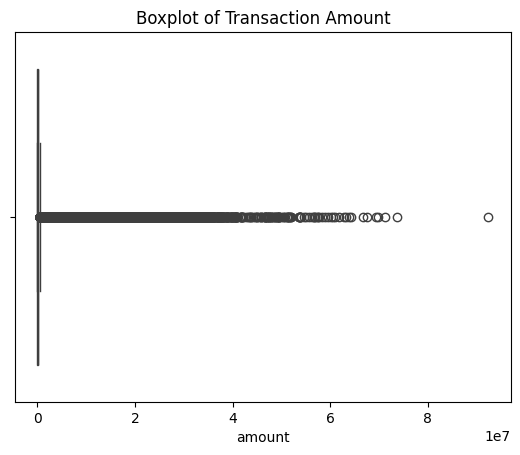

In [ ]:
sns.boxplot(x=df['amount'])
plt.title("Boxplot of Transaction Amount")
plt.show() #To find outliers

In [ ]:
largest_transaction_row = df.loc[df['amount'].idxmax()]
print(largest_transaction_row)

step                      276
type                 TRANSFER
amount            92445516.64
oldbalanceOrg             0.0
newbalanceOrig            0.0
oldbalanceDest        9595.98
newbalanceDest    92455112.62
isFraud                     0
isFlaggedFraud              0
Name: 3686583, dtype: object


In [ ]:
lowest_transaction_row = df.loc[df['amount'].idxmin()]
print(lowest_transaction_row)

step                   212
type              CASH_OUT
amount                 0.0
oldbalanceOrg          0.0
newbalanceOrig         0.0
oldbalanceDest         0.0
newbalanceDest         0.0
isFraud                  1
isFlaggedFraud           0
Name: 2736447, dtype: object


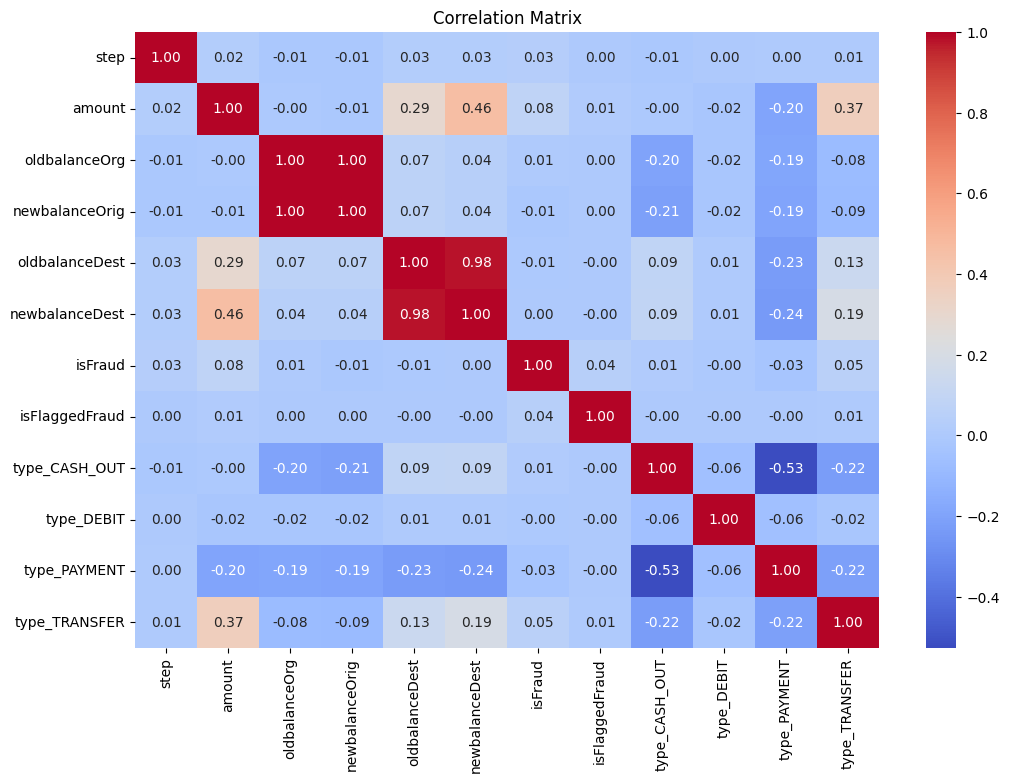

In [ ]:
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

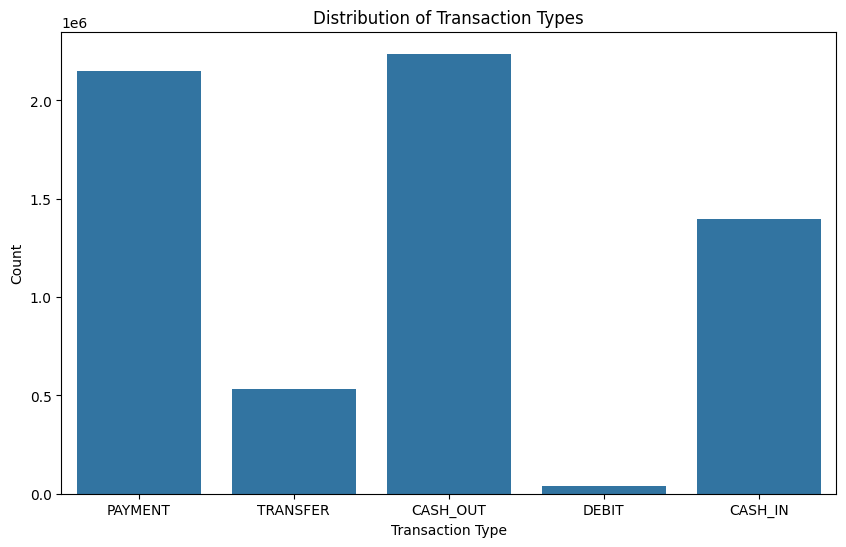

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

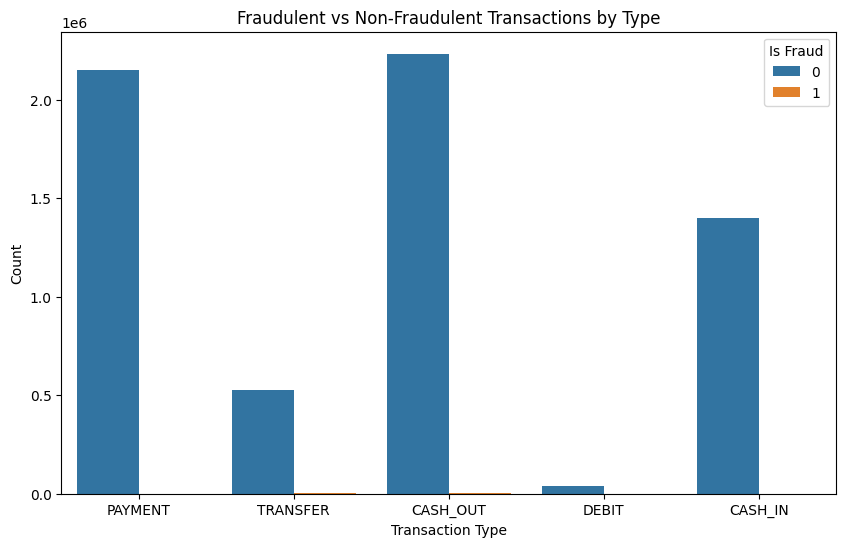

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', hue='isFraud')
plt.title('Fraudulent vs Non-Fraudulent Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

In [ ]:
fraudulent_transactions = df[df['isFraud'] == 1]
print(fraudulent_transactions.describe())

              step        amount  isFraud  isFlaggedFraud   sender_diff  \
count  8213.000000  8.213000e+03   8213.0     8213.000000  8.213000e+03   
mean    368.413856  1.467967e+06      1.0        0.001948  1.457275e+06   
std     216.388690  2.404253e+06      0.0        0.044097  2.396099e+06   
min       1.000000  0.000000e+00      1.0        0.000000  0.000000e+00   
25%     181.000000  1.270913e+05      1.0        0.000000  1.245826e+05   
50%     367.000000  4.414234e+05      1.0        0.000000  4.363175e+05   
75%     558.000000  1.517771e+06      1.0        0.000000  1.503035e+06   
max     743.000000  1.000000e+07      1.0        1.000000  1.000000e+07   

       receiver_diff  
count   8.213000e+03  
mean    7.354580e+05  
std     1.856984e+06  
min    -3.152261e+05  
25%     0.000000e+00  
50%     0.000000e+00  
75%     4.452574e+05  
max     1.491511e+07  


In [ ]:
print(df['isFlaggedFraud'].sum()) #Total number of transactions flagged as false

16


In [ ]:
print(df[(df['isFraud'] == 1) & (df['isFlaggedFraud'] == 1)].shape[0]) #Fraudulent transaction flagged as fraud

16


In [ ]:
print(df['isFraud'].sum()) #sum of fraudulent transactions

8213


###Model Creation

In [ ]:
df['sender_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']

In [ ]:
df['receiver_diff'] = df['newbalanceDest'] - df['oldbalanceDest']

In [ ]:
df = df.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1)

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'isFraud', 'isFlaggedFraud', 'sender_diff',
       'receiver_diff'],
      dtype='object')

In [ ]:
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)

In [ ]:
X

,step,type,amount,sender_diff,receiver_diff
0,1,PAYMENT,9839.64,9839.64,0.00
1,1,PAYMENT,1864.28,1864.28,0.00
2,1,TRANSFER,181.00,181.00,0.00
3,1,CASH_OUT,181.00,181.00,-21182.00
4,1,PAYMENT,11668.14,11668.14,0.00
...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,339682.13
6362616,743,TRANSFER,6311409.28,6311409.28,0.00
6362617,743,CASH_OUT,6311409.28,6311409.28,6311409.27
6362618,743,TRANSFER,850002.52,850002.52,0.00


In [ ]:
y = df['isFraud']

In [ ]:
y

,isFraud
0,0
1,0
2,1
3,1
4,0
...,...
6362615,1
6362616,1
6362617,1
6362618,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# One-hot encode the 'type' column in X_train and X_test
X_train = pd.get_dummies(X_train, columns=['type'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['type'], drop_first=True)

In [ ]:
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)

In [ ]:
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:29:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

###Model Evaluation

In [ ]:
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.96      0.73      0.83      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.87      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

ROC AUC Score: 0.9941148598158589


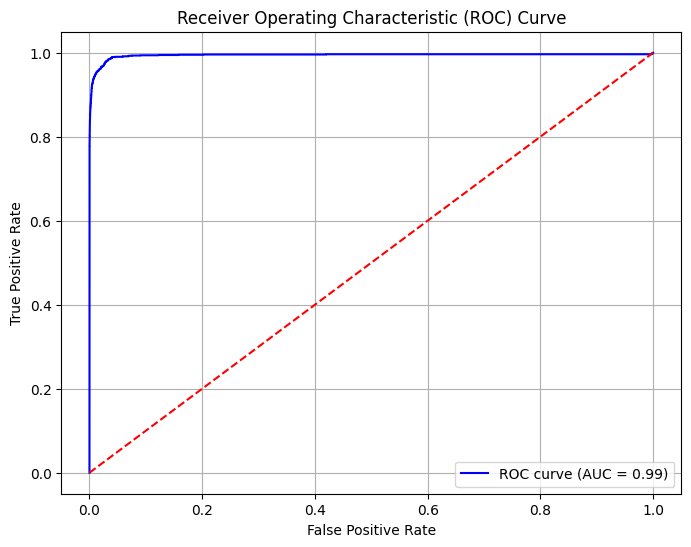

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

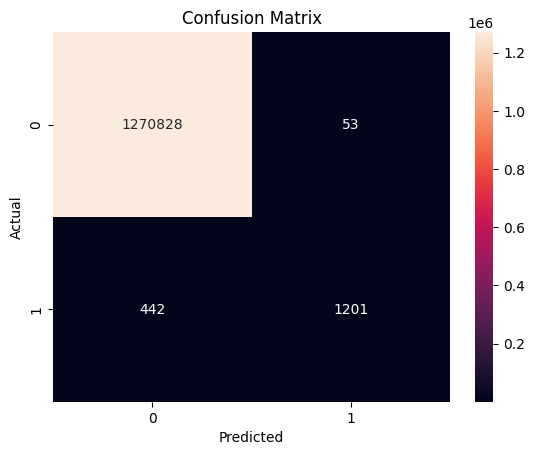

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()